# Rodando uma simples EMD

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import emd

Definimos uma forma de onda simulada contendo uma onda não linear em 5Hz e uma senoide em 1Hz:

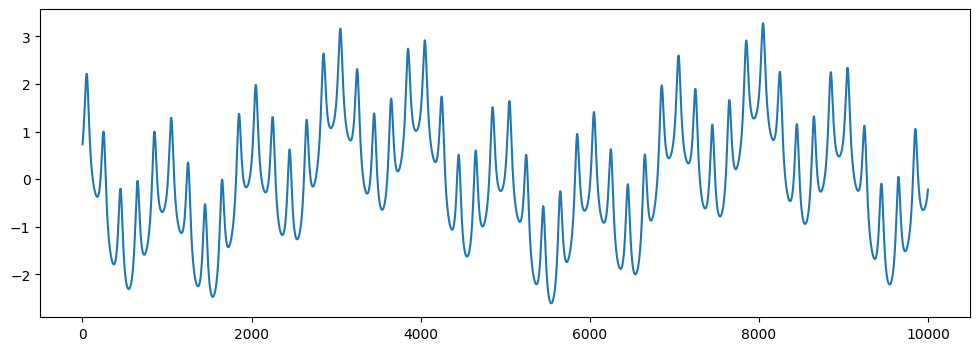

In [2]:
sample_rate = 1000
seconds = 10
num_samples = sample_rate*seconds

time_vect = np.linspace(0, seconds, num_samples)

freq = 5

nonlinearity_deg = 0.60

nonlinearity_phi = -np.pi/2

# Computando o sinal

# Criando uma oscilação não-linear
x = emd.simulate.abreu2010(freq, nonlinearity_deg, nonlinearity_phi, sample_rate, seconds)

x += np.cos(2 * np.pi * 1 * time_vect)        # Add a simple 1Hz sinusoid
x -= np.sin(2 * np.pi * 2.2e-1 * time_vect)   # Add part of a very slow cycle as a trend

# Visualise the time-series for analysis
plt.figure(figsize=(12, 4))
plt.plot(x)

Extraindo as IMFs do sinal

In [3]:
imf = emd.sift.sift(x)
print(imf.shape)

(10000, 4)


A partir das IMFs iremos computar as fases, frequências e amplitudes instântaneas usando o método da Transformada de Hilbert

In [4]:
IP, IF, IA = emd.spectra.frequency_transform(imf, sample_rate, 'hilbert')

Agora é possível computar o espectro de Hilbert-Huang

In [5]:
# Definindo o range de frequências (low_freq, high_freq, nsteps, spacing)
freq_range = (0.1, 10, 80, 'log')
f, hht = emd.spectra.hilberthuang(IF, IA, freq_range, sum_time=False)

## Visualização

<Axes: xlabel='Time (samples)'>

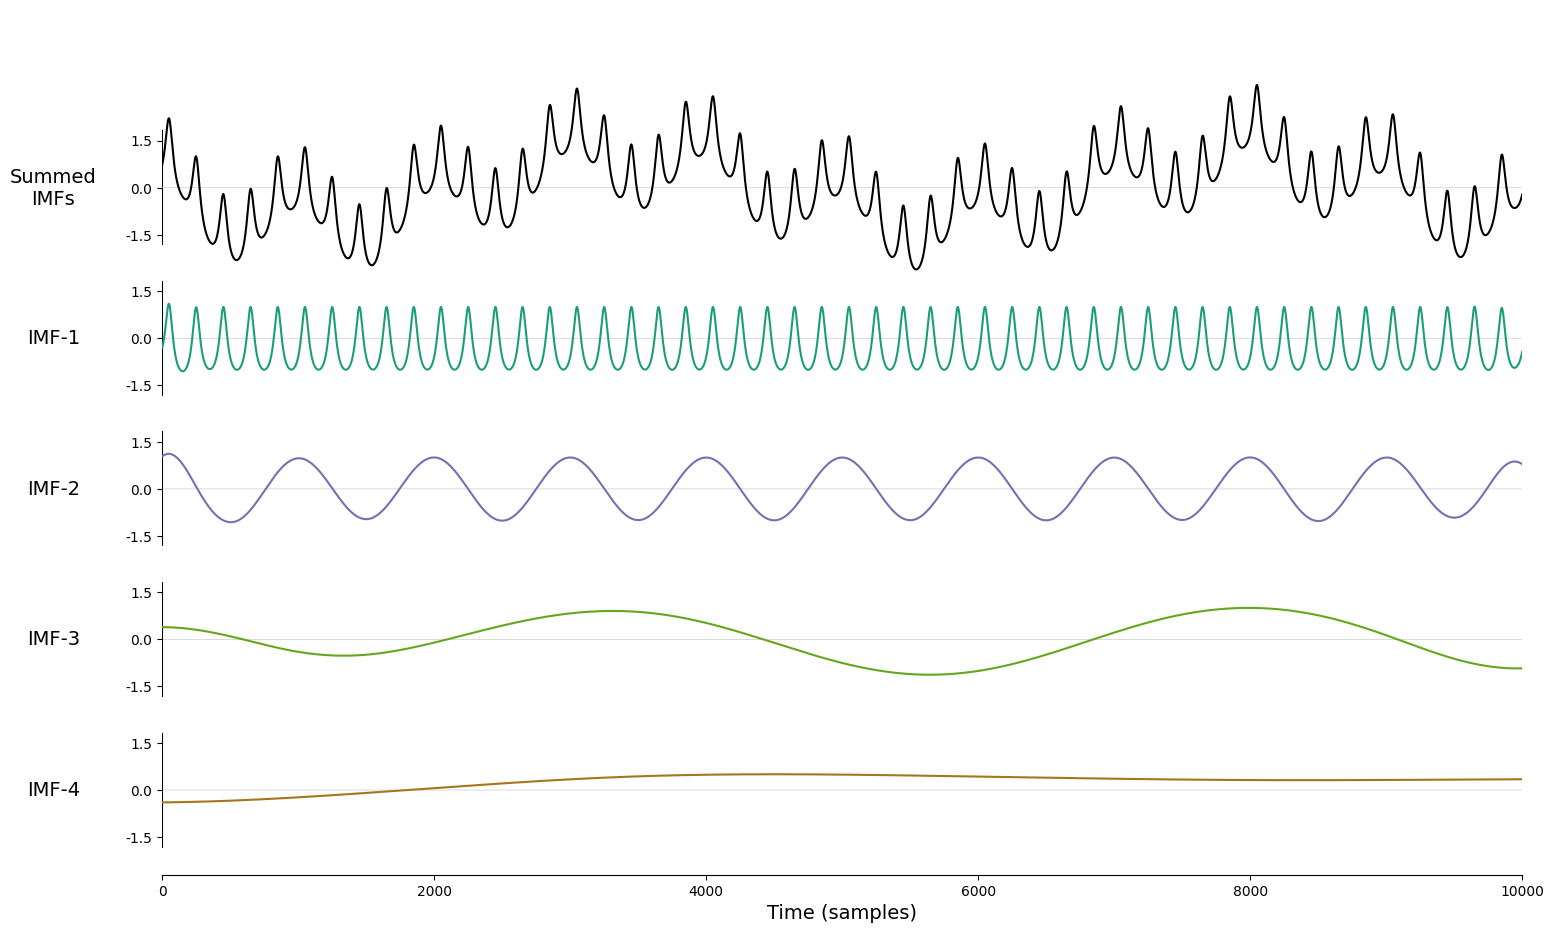

In [6]:
emd.plotting.plot_imfs(imf)

Agora a transformada de Hilbert dessa decomposição

<Axes: title={'center': 'Hilbert-Huang Transform'}, xlabel='Time', ylabel='Frequency'>

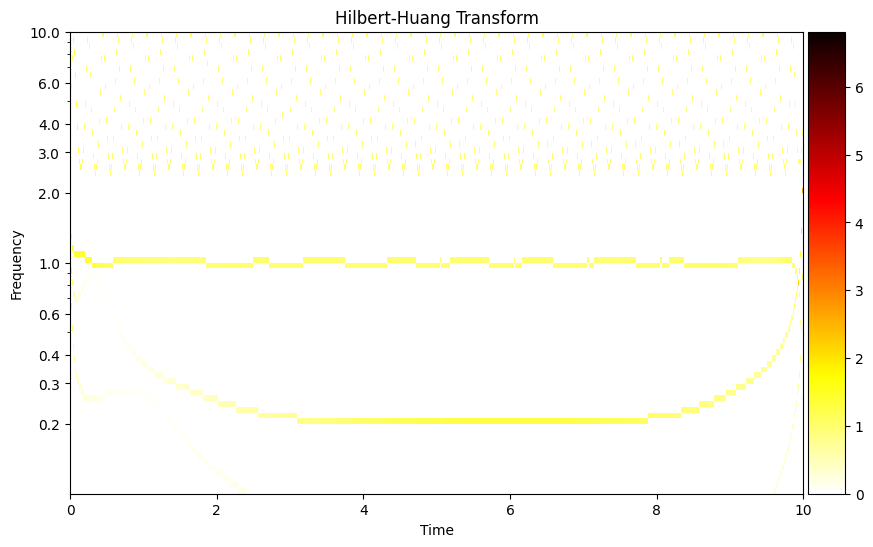

In [7]:
fig = plt.figure(figsize=(10, 6))
emd.plotting.plot_hilberthuang(hht, time_vect, f,
                               time_lims=(0, 10), freq_lims=(0.1, 15),
                               fig=fig, log_y=True)

É possível ver a frequência de 1Hz sendo predominante no sinal, assim como a frequência de 0.22

# Aplicando este tutorial em uma série de preços de soja

In [8]:
precos = pd.read_excel(r"C:\Users\Lenovo\Documents\MeusProjetos\Analise-Sincronia-SeriesTemporais-Soja\Series_Precos\Sorriso_jan21-set24.xlsx")
precos.set_index('Data', inplace=True)
precos = pd.DataFrame(precos['Valor'])
precos.head()

,Valor
Data,
2021-01-11,151.193366
2021-01-12,152.695531
2021-01-13,148.774896
2021-01-14,148.430713
2021-01-15,149.769147


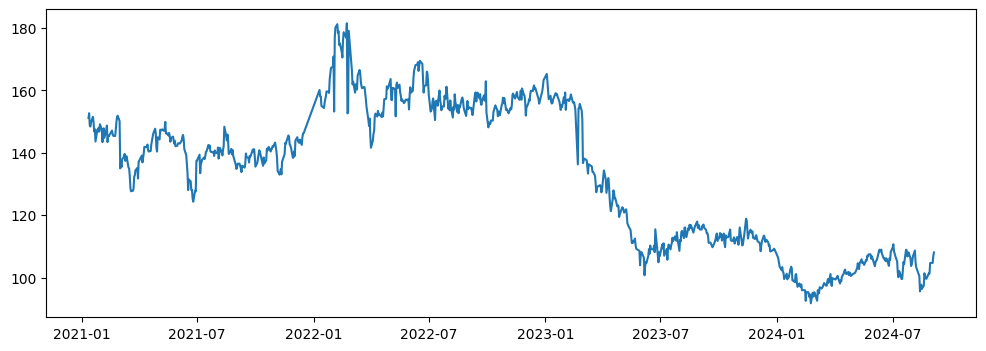

In [9]:
precos.dropna(inplace=True)

plt.figure(figsize=(12, 4))
plt.plot(precos)
plt.show()

Extraindo as IMFs

In [10]:
#A série precisa estar no formato ndarray
valores = precos['Valor'].to_numpy()
type(valores)

numpy.ndarray

In [11]:
imf = emd.sift.sift(valores, max_imfs=5)

In [12]:
IP, IF, IA = emd.spectra.frequency_transform(imf, len(valores), 'nht')

In [13]:
# Definindo o range de frequências (low_freq, high_freq, nsteps, spacing)
freq_range = (0.1, 15, 100, 'log')
f, hht = emd.spectra.hilberthuang(IF, IA, freq_range, sum_time=False)

<Axes: xlabel='Time (samples)'>

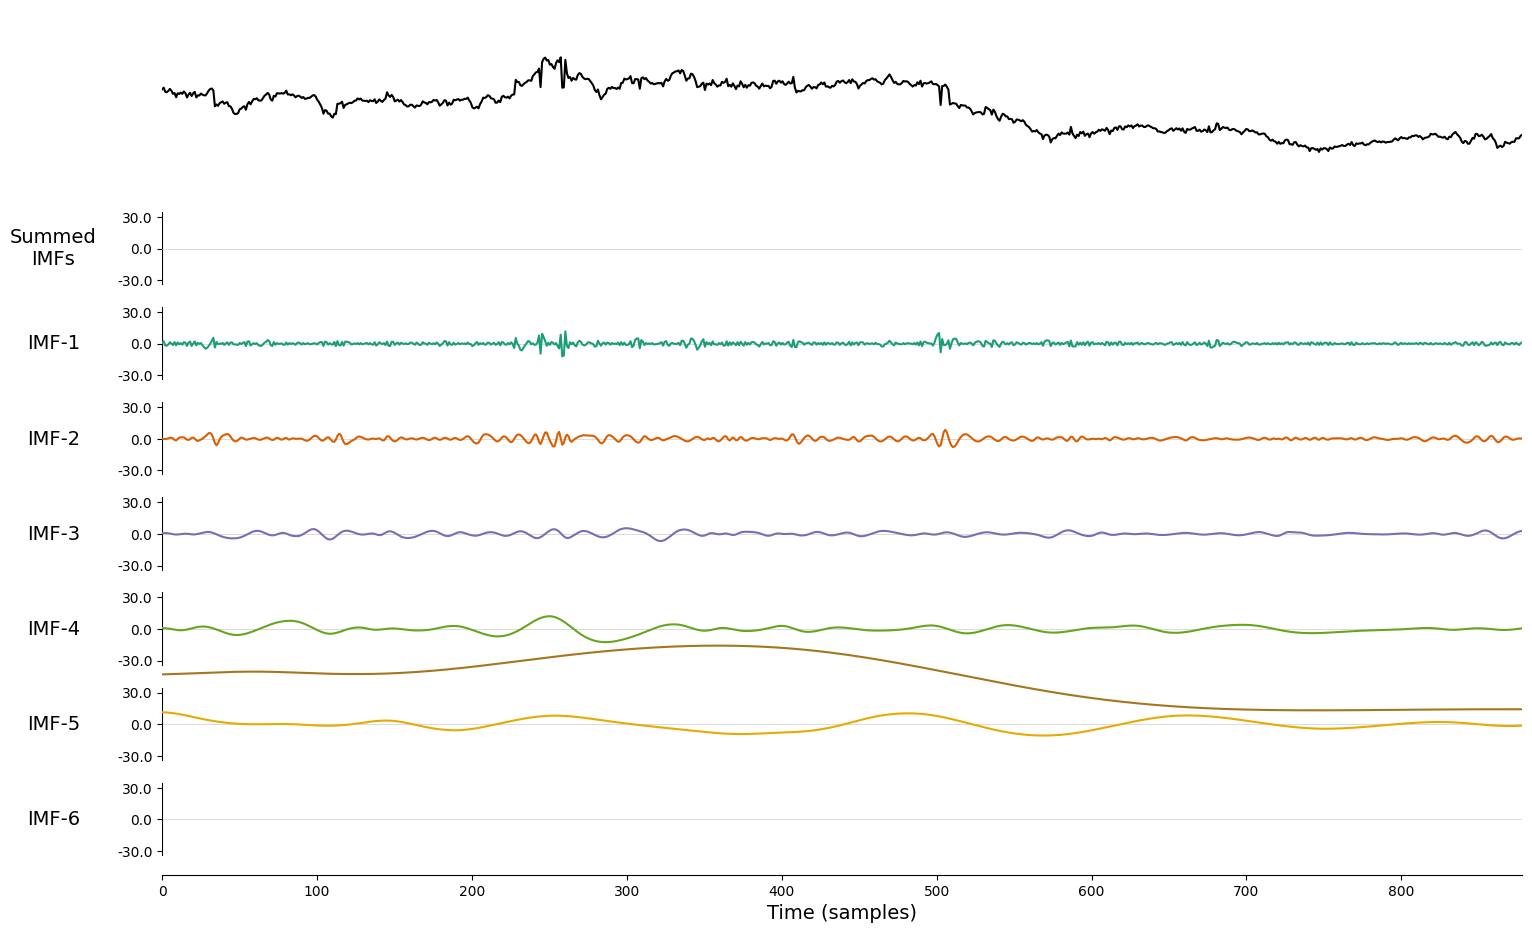

In [14]:
emd.plotting.plot_imfs(imf)

In [15]:
time_vect = np.linspace(0, len(valores))

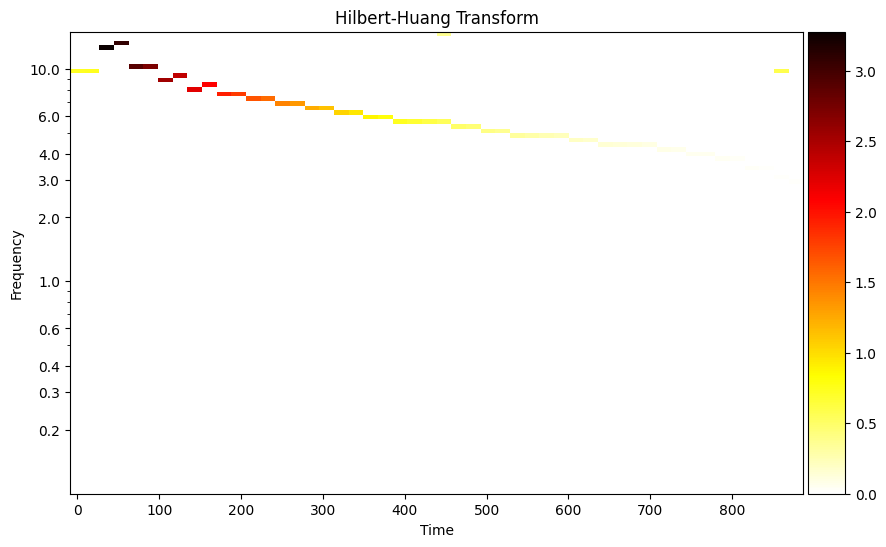

In [16]:
fig = plt.figure(figsize=(10, 6))
emd.plotting.plot_hilberthuang(hht, time_vect, f,
                               time_lims=(0,len(valores)), freq_lims=(0.1, 15),
                               fig=fig, log_y=True)
plt.show()

# Testando agora para os retornos

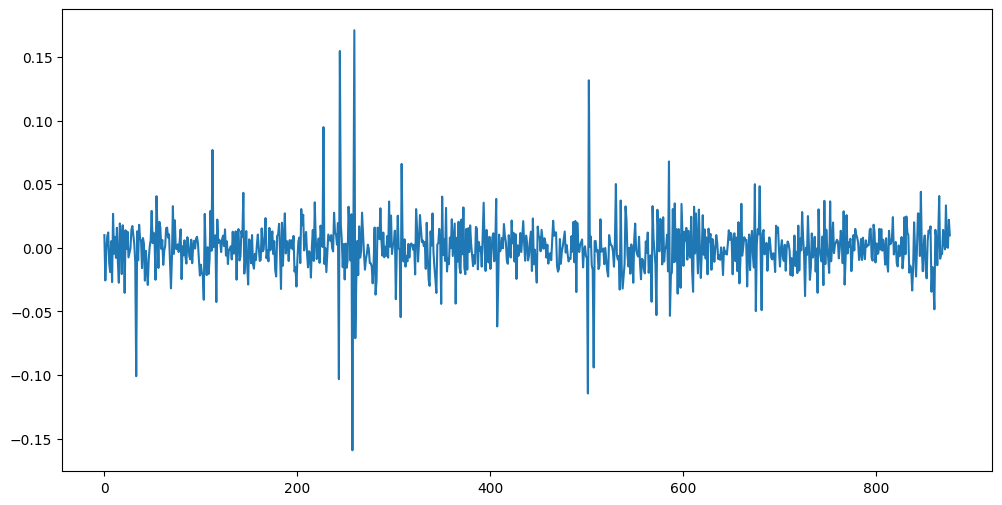

In [17]:
valores = pd.Series(valores)

retornos = valores.pct_change()
retornos.dropna(inplace=True)
retornos = retornos.to_numpy()

plt.figure(figsize=(12,6))
plt.plot(retornos)
plt.show()

<Axes: xlabel='Time (samples)'>

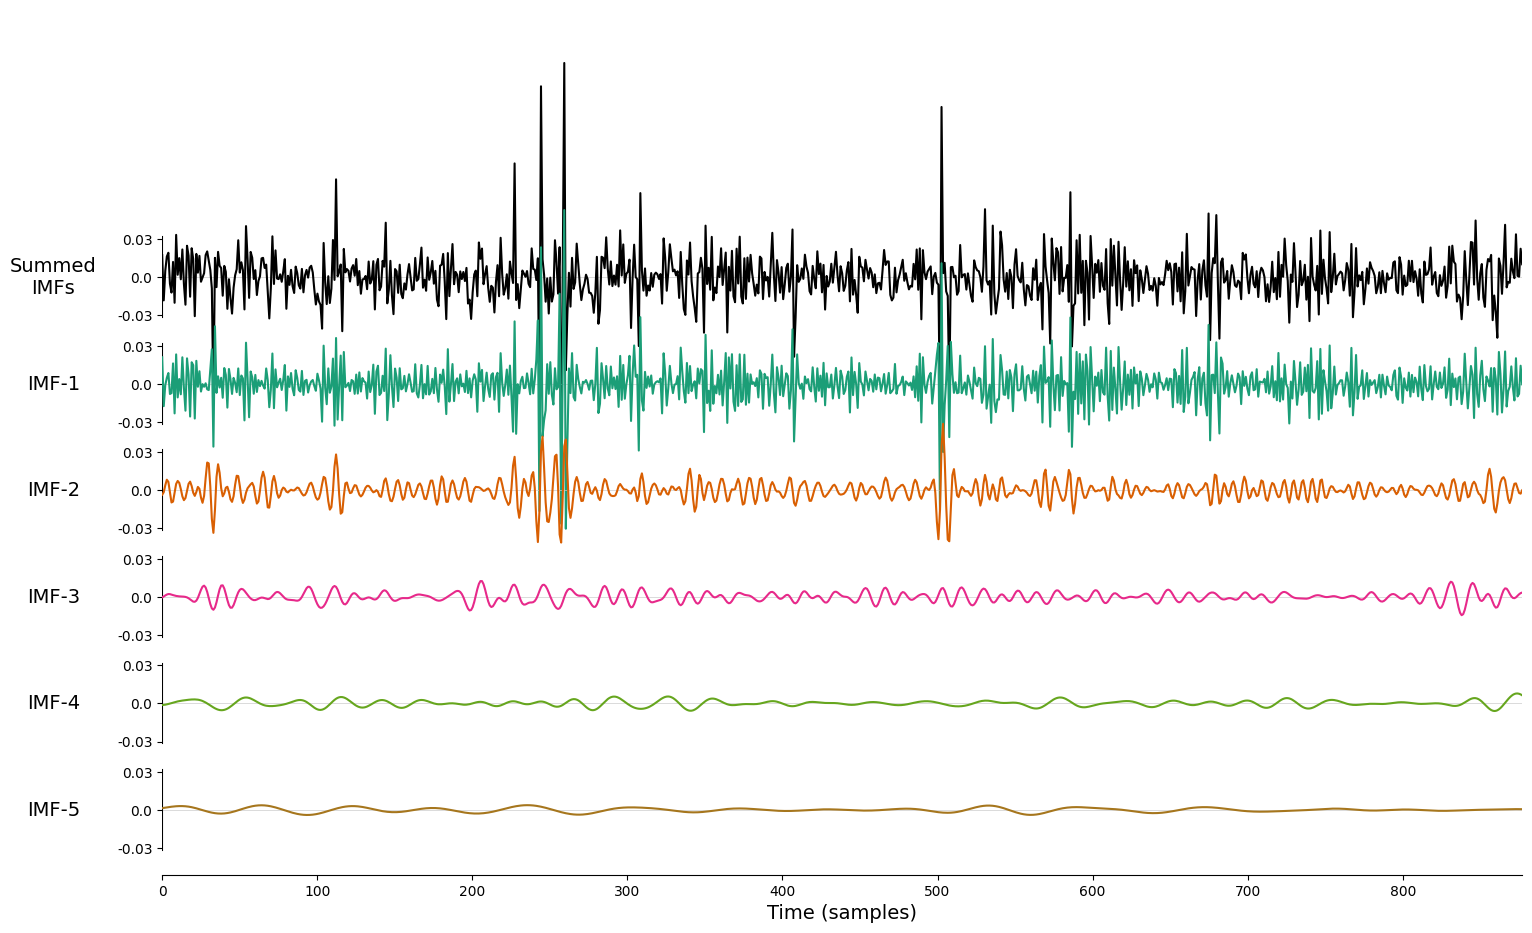

In [18]:
imf_ret = emd.sift.mask_sift(retornos, max_imfs=5)
IP, IF, IA = emd.spectra.frequency_transform(imf_ret, len(retornos), 'nht')
freq_range = (0.1, 15, 100, 'log')
f, hht = emd.spectra.hilberthuang(IF, IA, freq_range, sum_time=False)
emd.plotting.plot_imfs(imf_ret)

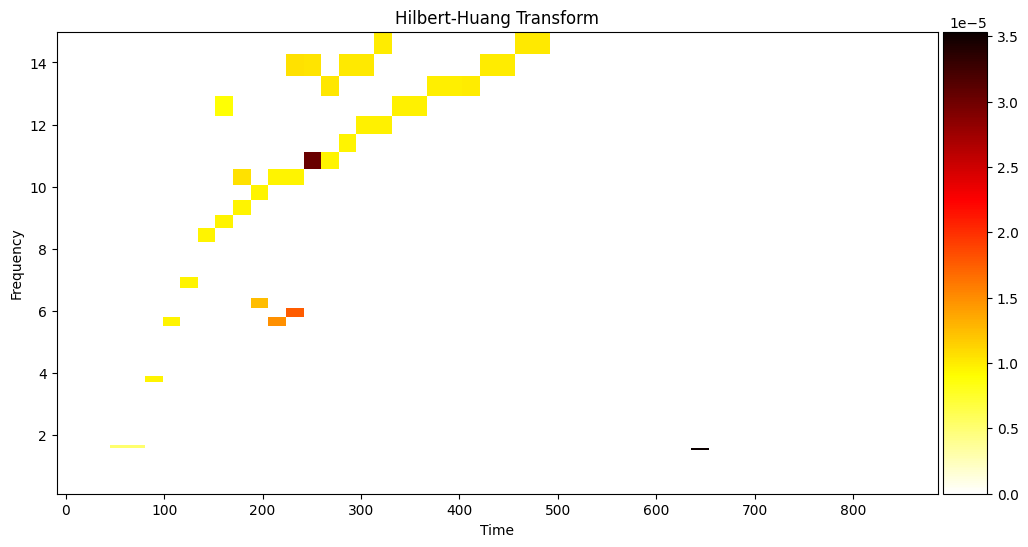

In [19]:
time_vect = np.linspace(0, len(retornos))

fig = plt.figure(figsize=(12, 6))
emd.plotting.plot_hilberthuang(hht, time_vect, f,
                               time_lims=(0,len(retornos)), freq_lims=(0.1, 15),
                               fig=fig, log_y=False)
plt.show()

# Montando o Espectro de Hilbert para cada IMF da série original de preços

## IMF-1

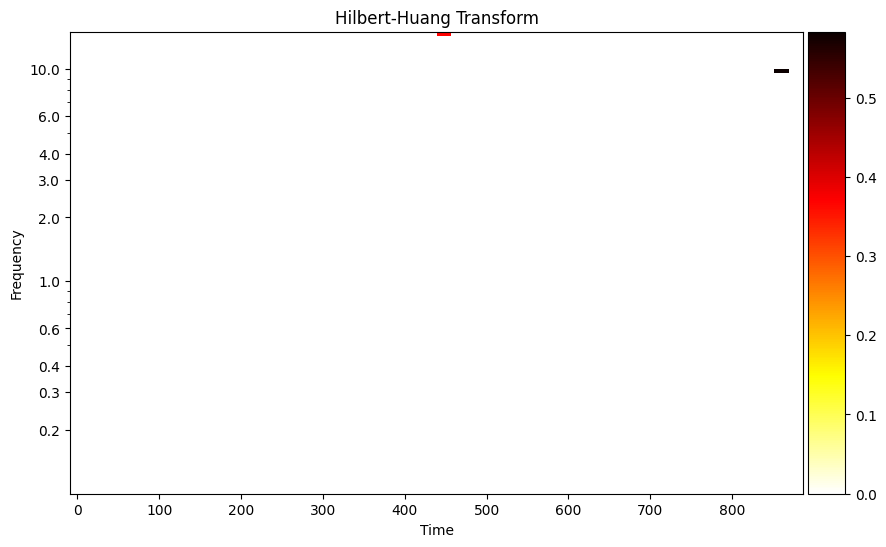

In [20]:
valores = precos['Valor'].to_numpy()

imf = emd.sift.sift(valores, max_imfs=5)
IP, IF, IA = emd.spectra.frequency_transform(imf, len(valores), 'nht')

# Definindo o range de frequências (low_freq, high_freq, nsteps, spacing)
freq_range = (0.1, 15, 100, 'log')

f, hht = emd.spectra.hilberthuang(IF[:, 0], IA[:, 0], freq_range, sum_time=False)   #Extraindo as frequências e amplitudes da primeira IMF
time_vect = np.linspace(0, len(valores))

#Plot do espectro da IMF-1
fig = plt.figure(figsize=(10, 6))
emd.plotting.plot_hilberthuang(hht, time_vect, f,
                               time_lims=(0,len(valores)), freq_lims=(0.1, 15),
                               fig=fig, log_y=True)
plt.show()

A primeira IMF apresentou frequências de mais de 10Hz, como esperado

## IMF-2

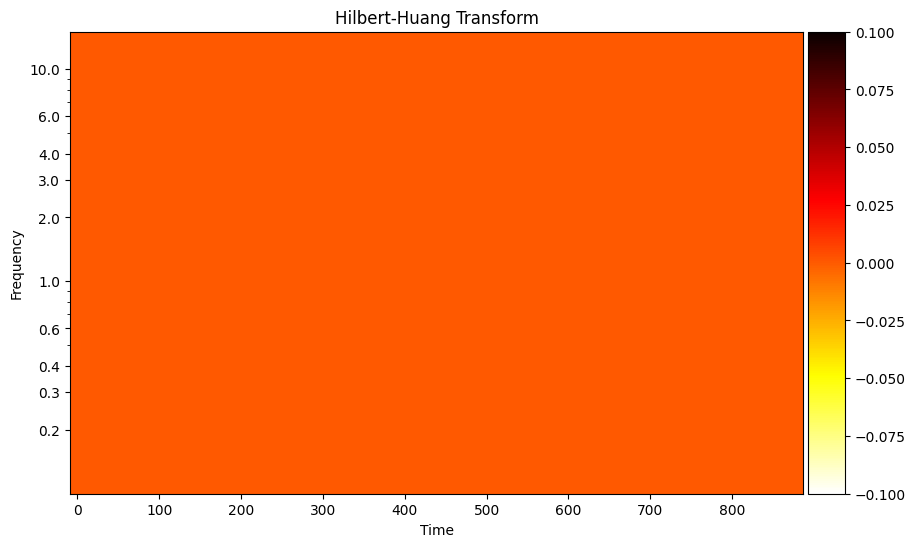

In [21]:
imf = emd.sift.sift(valores, max_imfs=5)
IP, IF, IA = emd.spectra.frequency_transform(imf, len(valores), 'nht')

# Definindo o range de frequências (low_freq, high_freq, nsteps, spacing)
freq_range = (0.1, 15, 100, 'log')

f, hht = emd.spectra.hilberthuang(IF[:, 1], IA[:, 1], freq_range, sum_time=False)
time_vect = np.linspace(0, len(valores))

#Plot do espectro da IMF-2
fig = plt.figure(figsize=(10, 6))
emd.plotting.plot_hilberthuang(hht, time_vect, f,
                               time_lims=(0,len(valores)), freq_lims=(0.1, 15),
                               fig=fig, log_y=True)
plt.show()

Algo deu errado na IMF-2, porém apresenta amplitudes nulas

## IMF-3

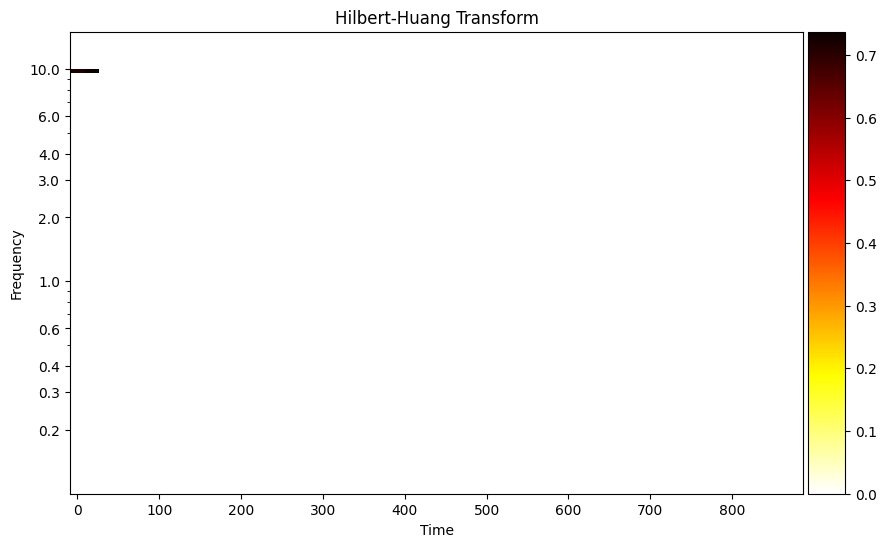

In [22]:
f, hht = emd.spectra.hilberthuang(IF[:, 2], IA[:, 2], freq_range, sum_time=False)
time_vect = np.linspace(0, len(valores))

#Plot do espectro da IMF-3
fig = plt.figure(figsize=(10, 6))
emd.plotting.plot_hilberthuang(hht, time_vect, f,
                               time_lims=(0,len(valores)), freq_lims=(0.1, 15),
                               fig=fig, log_y=True)
plt.show()

A IMF-3 apresentou frequência de 10Hz com alta amplitude no início da série temporal

## IMF-4

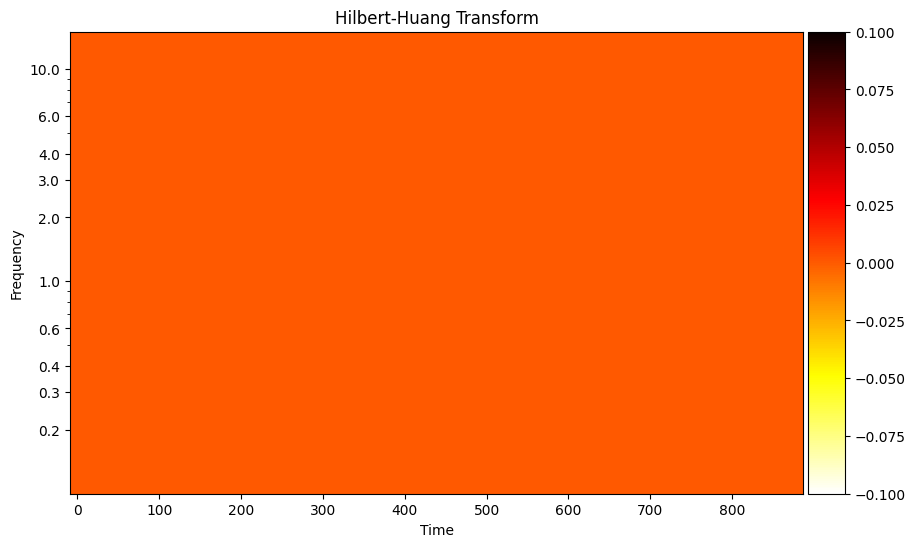

In [23]:
f, hht = emd.spectra.hilberthuang(IF[:, 3], IA[:, 3], freq_range, sum_time=False)
time_vect = np.linspace(0, len(valores))

#Plot do espectro da IMF-3
fig = plt.figure(figsize=(10, 6))
emd.plotting.plot_hilberthuang(hht, time_vect, f,
                               time_lims=(0,len(valores)), freq_lims=(0.1, 15),
                               fig=fig, log_y=True)
plt.show()

Algum erro

## IMF-5

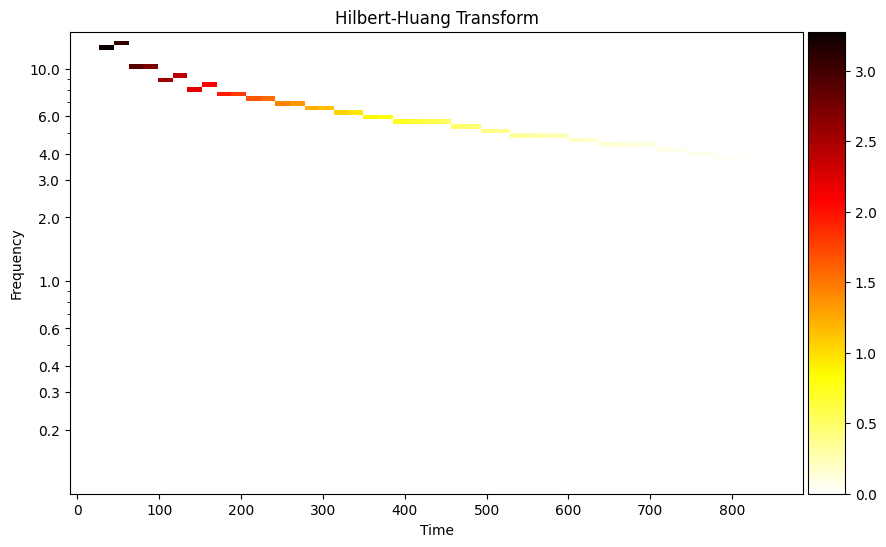

In [24]:
f, hht = emd.spectra.hilberthuang(IF[:, 4], IA[:, 4], freq_range, sum_time=False)
time_vect = np.linspace(0, len(valores))

#Plot do espectro da IMF-3
fig = plt.figure(figsize=(10, 6))
emd.plotting.plot_hilberthuang(hht, time_vect, f,
                               time_lims=(0,len(valores)), freq_lims=(0.1, 15),
                               fig=fig, log_y=True)
plt.show()

A IMF-5 parece ser a que melhor caracteriza o sinal

## Espectro completo com todas IMFs

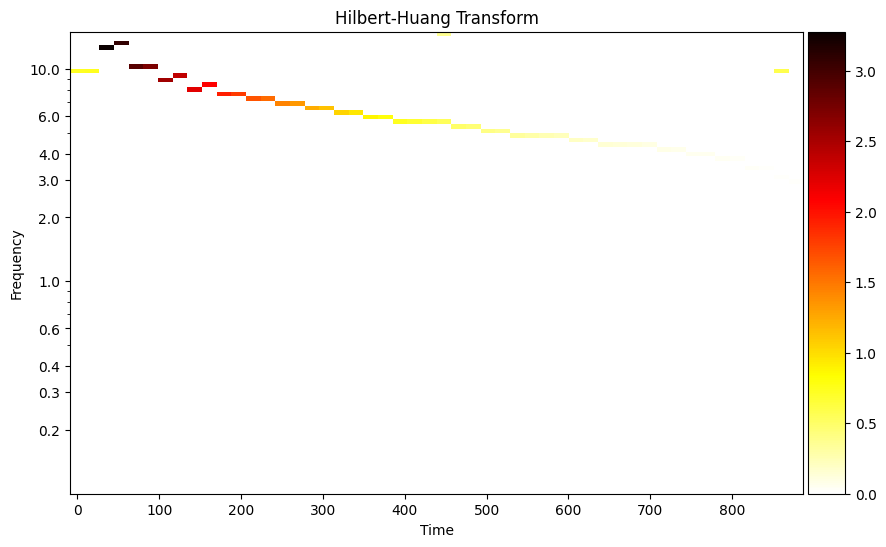

In [25]:
f, hht = emd.spectra.hilberthuang(IF, IA, freq_range, sum_time=False)
time_vect = np.linspace(0, len(valores))

#Plot do espectro total
fig = plt.figure(figsize=(10, 6))
emd.plotting.plot_hilberthuang(hht, time_vect, f,
                               time_lims=(0,len(valores)), freq_lims=(0.1, 15),
                               fig=fig, log_y=True)
plt.show()

## Novamente um plot das IMFs

<Axes: xlabel='Time (samples)'>

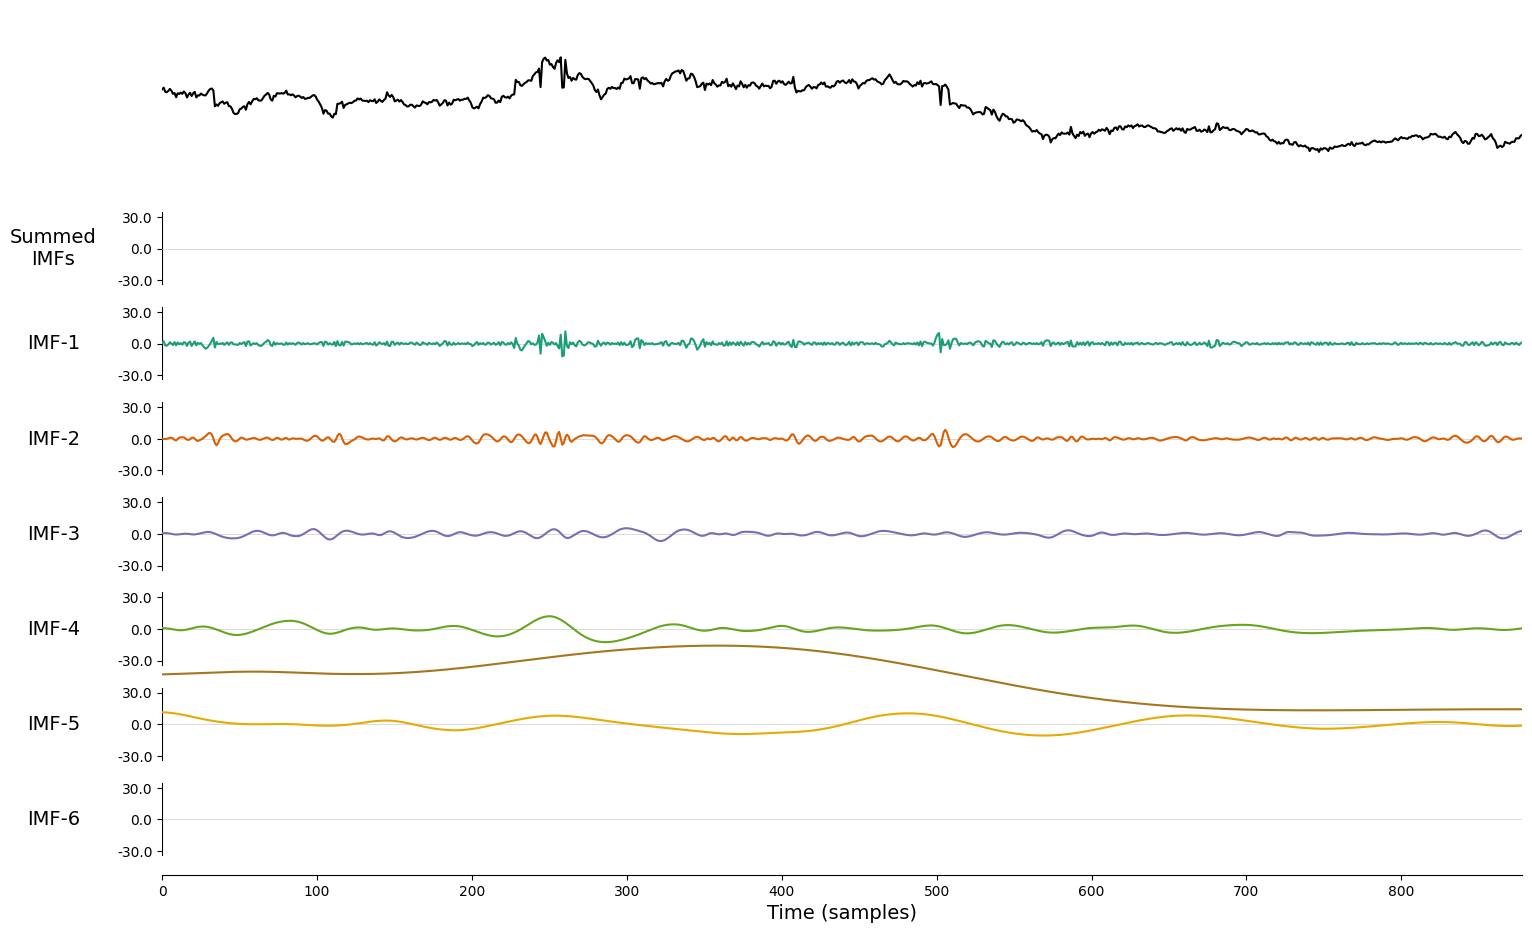

In [26]:
emd.plotting.plot_imfs(imf)

## Plot das frequências das IMFs pares que apresentaram amplitude nula

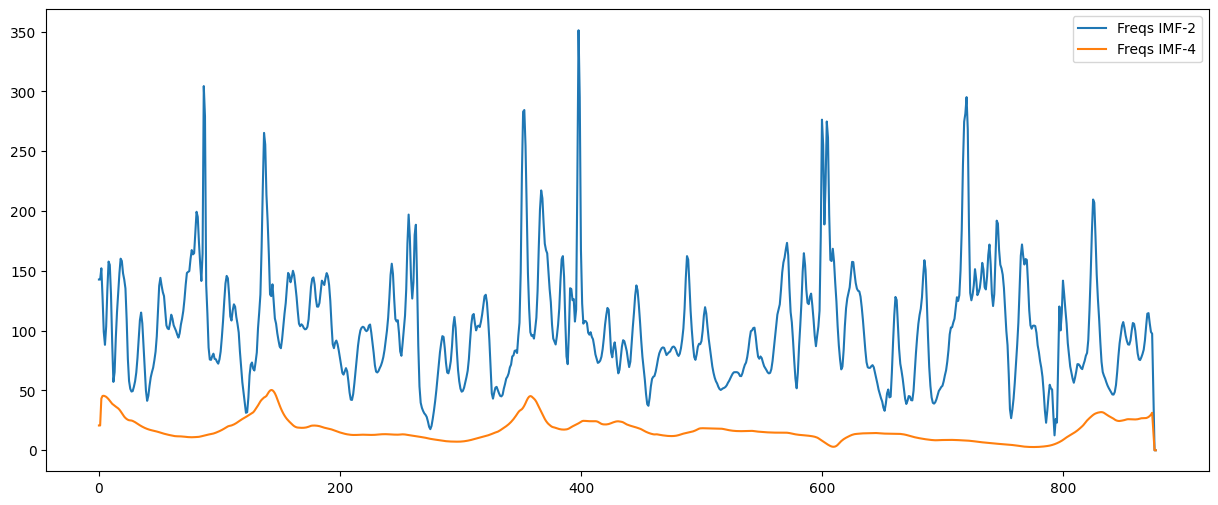

In [27]:
plt.figure(figsize=(15,6))
plt.plot(IF[:, 1], label='Freqs IMF-2')
plt.plot(IF[:, 3], label='Freqs IMF-4')
plt.legend()
plt.show()

# Análise das IMFs individuais dos retornos

## IMF-1

IMF-1


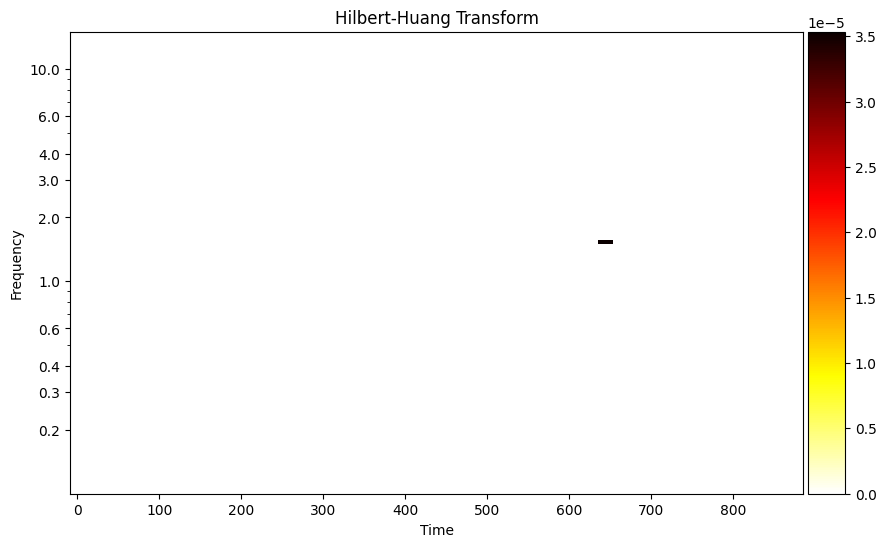

IMF-2


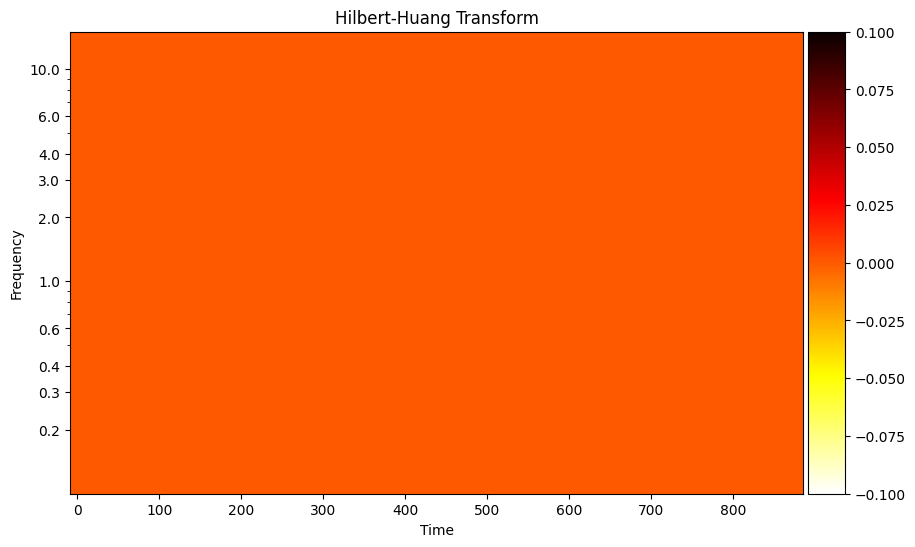

IMF-3


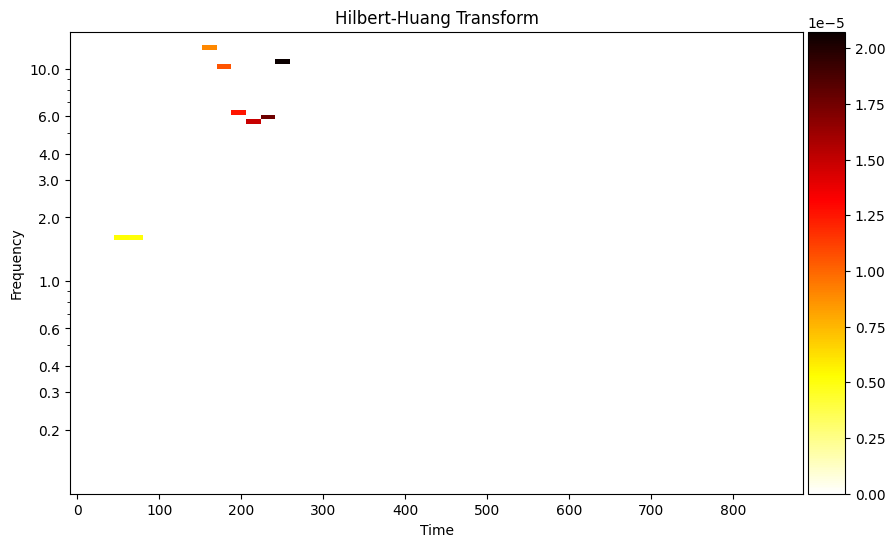

IMF-4


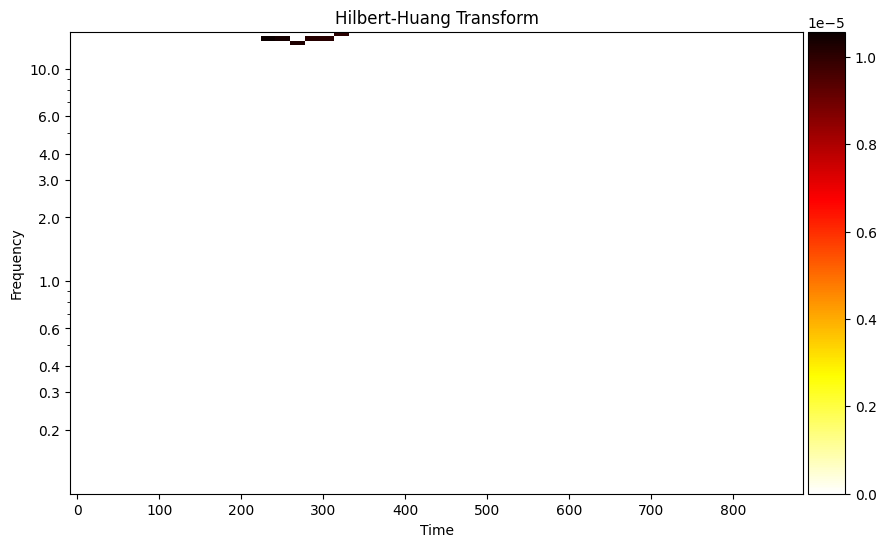

IMF-5


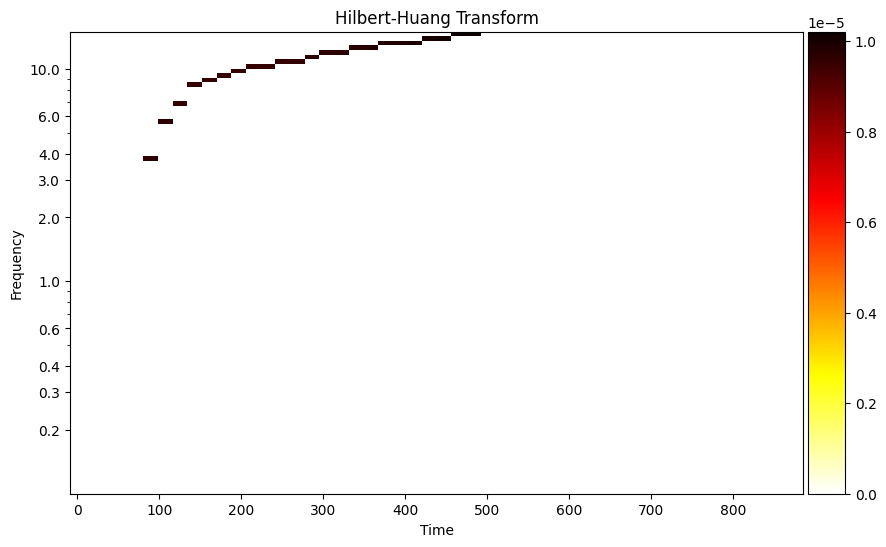

In [28]:
imf = emd.sift.mask_sift(retornos, max_imfs=5)
IP, IF, IA = emd.spectra.frequency_transform(imf, len(retornos), 'nht')

for i in range(0, 5):
    freq_range = (0.1, 15, 100, 'log')

    f, hht = emd.spectra.hilberthuang(IF[:, i], IA[:, i], freq_range, sum_time=False)
    time_vect = np.linspace(0, len(retornos))

    #Plot do espectro da IMF-i
    fig = plt.figure(figsize=(10, 6))
    print(f'IMF-{i+1}')
    emd.plotting.plot_hilberthuang(hht, time_vect, f,
                                time_lims=(0,len(retornos)), freq_lims=(0.1, 15),
                                fig=fig, log_y=True)
    plt.show()



## Espectro total

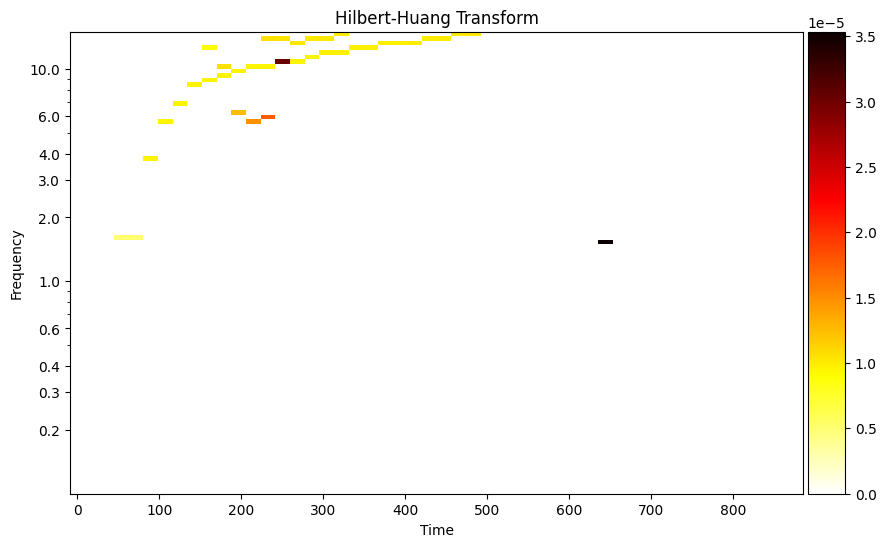

In [29]:
freq_range = (0.1, 15, 100, 'log')
f, hht = emd.spectra.hilberthuang(IF, IA, freq_range, sum_time=False)
time_vect = np.linspace(0, len(retornos))

#Plot do espectro total
fig = plt.figure(figsize=(10, 6))
emd.plotting.plot_hilberthuang(hht, time_vect, f,
                               time_lims=(0,len(retornos)), freq_lims=(0.1, 15),
                               fig=fig, log_y=True)
plt.show()

<Axes: xlabel='Time (samples)'>

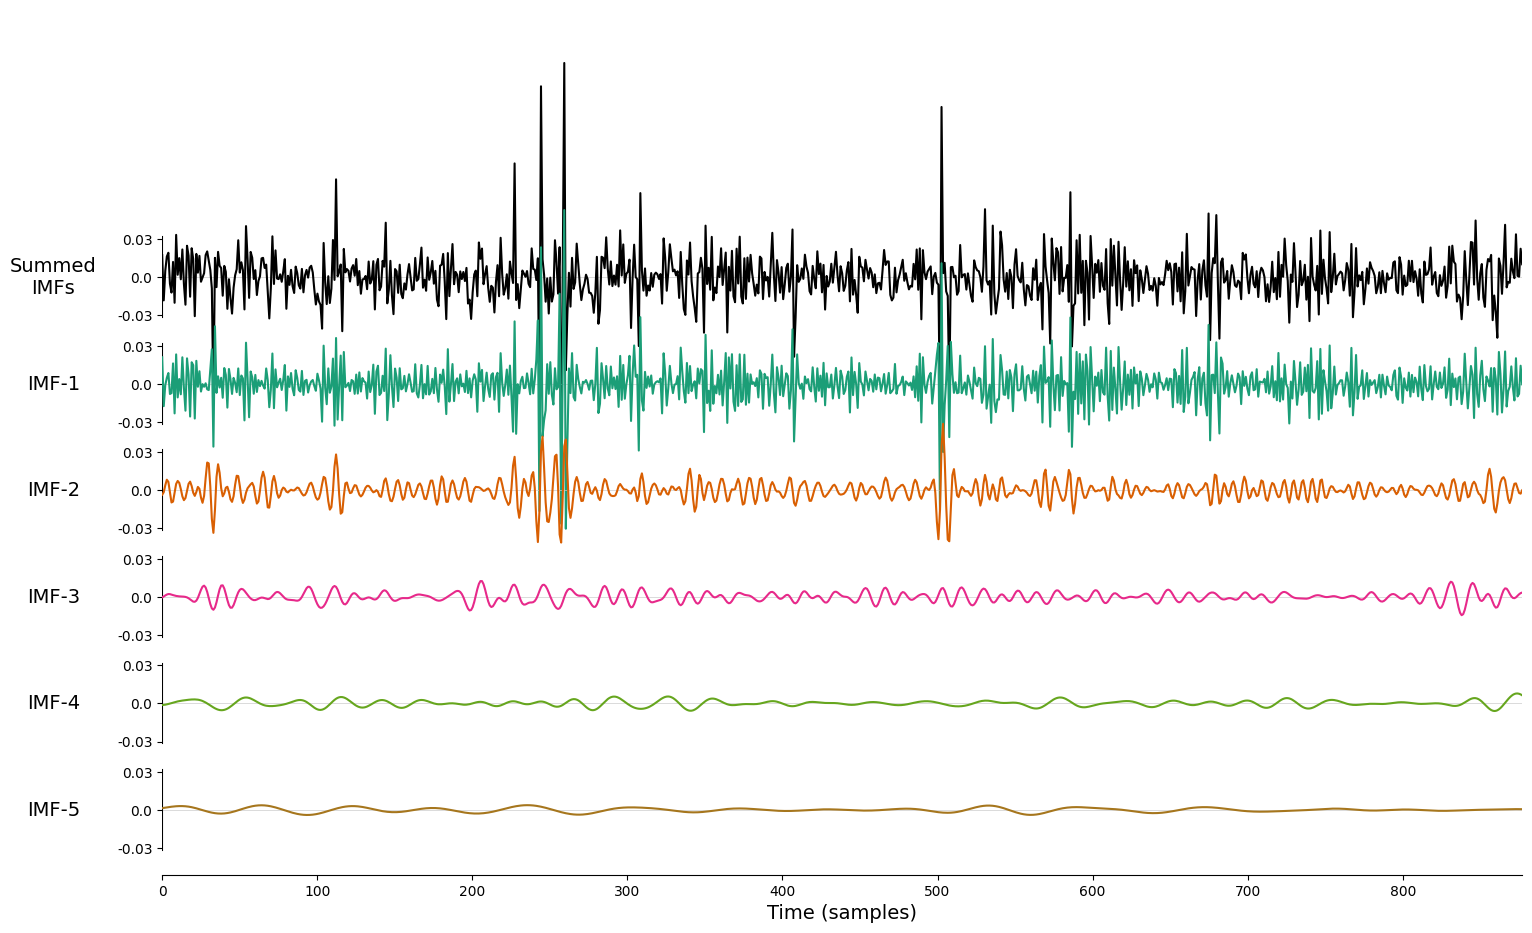

In [120]:
emd.plotting.plot_imfs(imf_ret)

# Teste com uma série temporal de basis

In [30]:
soja_df = pd.read_excel(r"C:\Users\Lenovo\Documents\MeusProjetos\Analise-Sincronia-SeriesTemporais-Soja\Basis\Excel Preço local Barreiras.xlsx")    #o r antes da string significa uma string raw em que o caminho do arquivo é lido normalmente
soja_df

,Data,Preço
0,2012-01-02,41.5
1,2012-01-03,41.5
2,2012-01-04,41.5
3,2012-01-05,41.5
4,2012-01-06,41.5
...,...,...
2644,2024-08-26,114.88
2645,2024-08-27,114.63
2646,2024-08-28,116.88
2647,2024-08-29,117.63


In [31]:
soja_df = soja_df.rename(columns={'Data':'DATA'})
soja_df = soja_df.set_index('DATA')
soja_df['Preço'] = pd.to_numeric(soja_df['Preço'], errors='coerce')
soja_df.dropna(subset=['Preço'],inplace=True)
soja_df = soja_df.rename(columns={'Preço':'PRECOLOCAL'})

In [32]:
futuro_df = pd.read_csv(r'C:\Users\Lenovo\Documents\MeusProjetos\Analise-Sincronia-SeriesTemporais-Soja\Basis\soybean-prices-historical-chart-data.csv')

futuro_df

,date,value
0,1968-12-05,2.4375
1,1968-12-06,2.4475
2,1968-12-09,2.4363
3,1968-12-10,2.4375
4,1968-12-11,2.4463
...,...,...
14024,2024-07-16,10.9200
14025,2024-07-17,10.9900
14026,2024-07-18,10.9900
14027,2024-07-19,10.9600


In [33]:
futuro_df = futuro_df.rename(columns={'date':'DATA', ' value':'PRECOFUTURO'})
futuro_df['DATA'] = pd.to_datetime(futuro_df['DATA'])
futuro_df.set_index('DATA', inplace=True)
sojas_df = pd.merge(soja_df['PRECOLOCAL'], futuro_df, how='left', on='DATA')
sojas_df.loc['2022-01-14':'2022-01-20']

,PRECOLOCAL,PRECOFUTURO
DATA,,
2022-01-14,162.67,13.6975
2022-01-17,162.67,NaN
2022-01-18,162.67,13.6125
2022-01-19,156.50,13.9125
2022-01-20,154.00,14.2575


In [36]:
%run C:\Users\Lenovo\Documents\MeusProjetos\Analise-Sincronia-SeriesTemporais-Soja\Basis\Funcoes.ipynb

In [37]:
quant_nulo = sojas_df.PRECOFUTURO.isna().sum()
sojas_df = sojas_df.drop('2012-01-02')
sojas_df = preenche_anterior(sojas_df, 'PRECOFUTURO')

from requests import get
url = "https://olinda.bcb.gov.br/olinda/servico/PTAX/versao/v1/odata/CotacaoDolarPeriodo(dataInicial=@dataInicial,dataFinalCotacao=@dataFinalCotacao)?@dataInicial='01-03-2012'&@dataFinalCotacao='07-22-2024'&$top=1000000&$format=json&$select=cotacaoCompra,dataHoraCotacao"
r = get(url)
r = r.json()
dolar_df = pd.DataFrame(r['value'])

dolar_df = dolar_df[['dataHoraCotacao','cotacaoCompra']].rename(columns={'cotacaoCompra':'DOLAR_PTAX', 'dataHoraCotacao':'DATA'}).copy()
dolar_df.DATA = pd.to_datetime(dolar_df.DATA).dt.strftime('%Y-%m-%d')
dolar_df.DATA = pd.to_datetime(dolar_df.DATA)
dolar_df.set_index('DATA', inplace=True)

result_df = pd.merge(sojas_df[['PRECOLOCAL', 'PRECOFUTURO']], dolar_df, on='DATA')

conversao_saca_bushel = 2.2046
result_df.PRECOLOCAL = (result_df.PRECOLOCAL / result_df.DOLAR_PTAX) / conversao_saca_bushel

result_df['BASIS'] = (result_df.PRECOLOCAL - result_df.PRECOFUTURO)*100

result_df = result_df.drop(result_df.index[result_df.index <= '2016-01-01'])

basis = result_df['BASIS']

basis

DATA
2016-03-18   -106.780229
2016-03-21   -113.092054
2016-03-22   -117.929803
2016-03-23   -122.864989
2016-03-28   -123.949794
                 ...    
2024-07-16   -127.600636
2024-07-17   -141.586992
2024-07-18   -155.302113
2024-07-19   -147.674550
2024-07-22   -151.842377
Name: BASIS, Length: 2004, dtype: float64

In [39]:
basis = basis.to_numpy()
type(basis)

numpy.ndarray

# IMFs do Basis

IMF-1


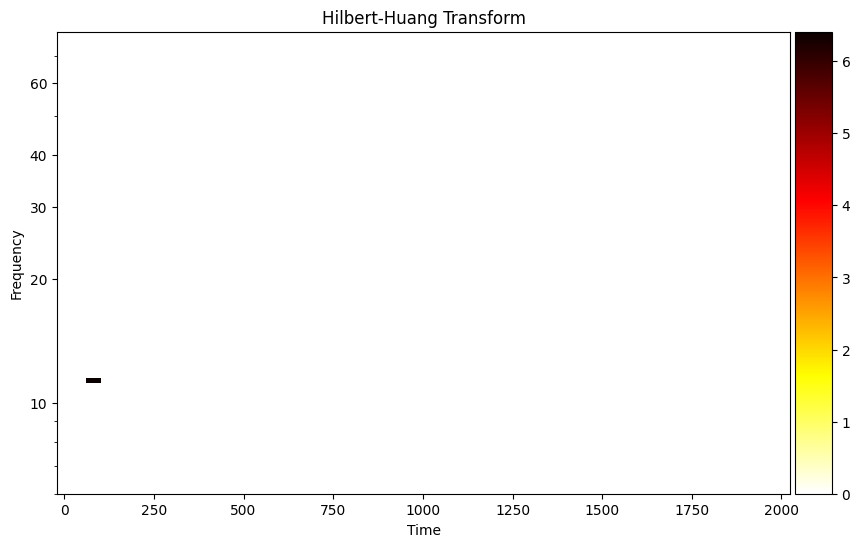

IMF-2


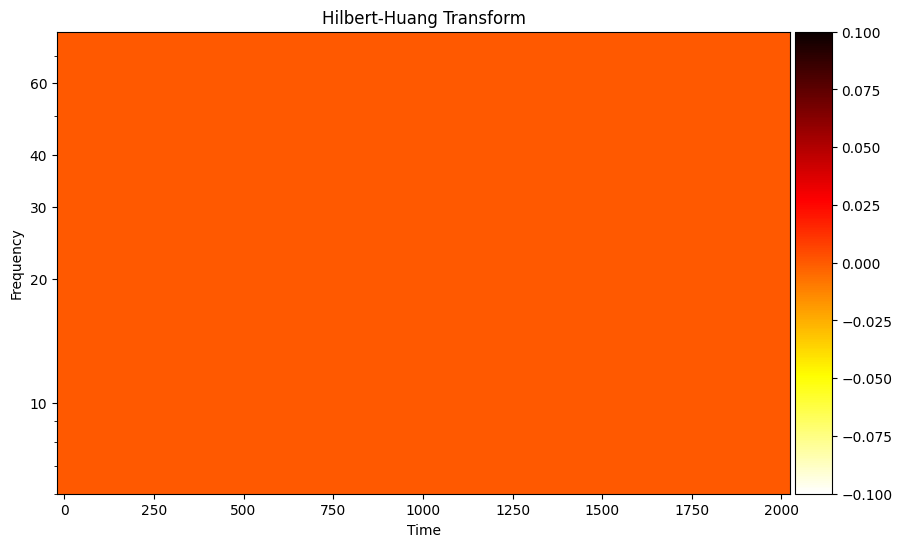

IMF-3


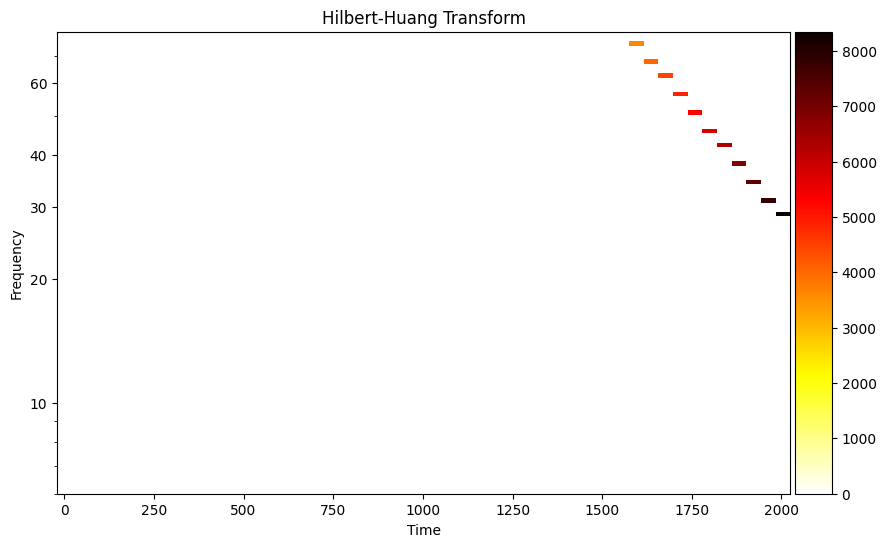

IMF-4


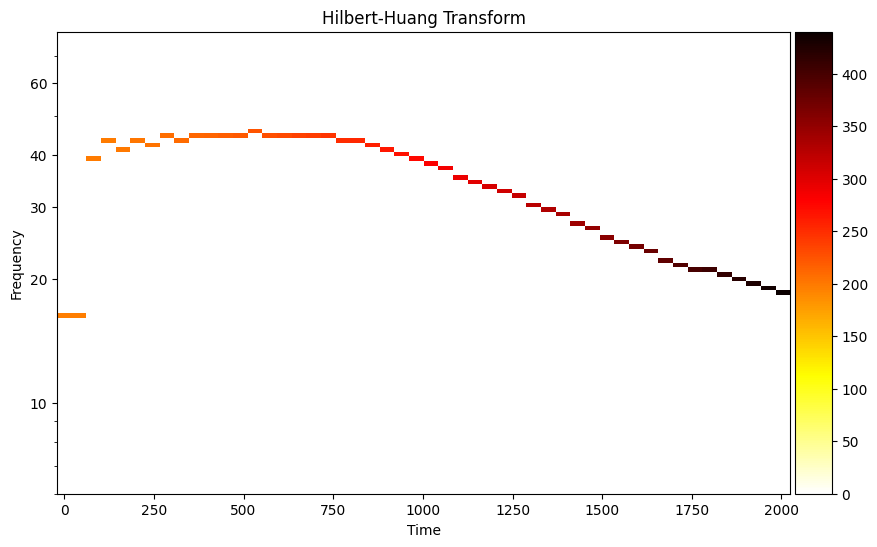

IMF-5


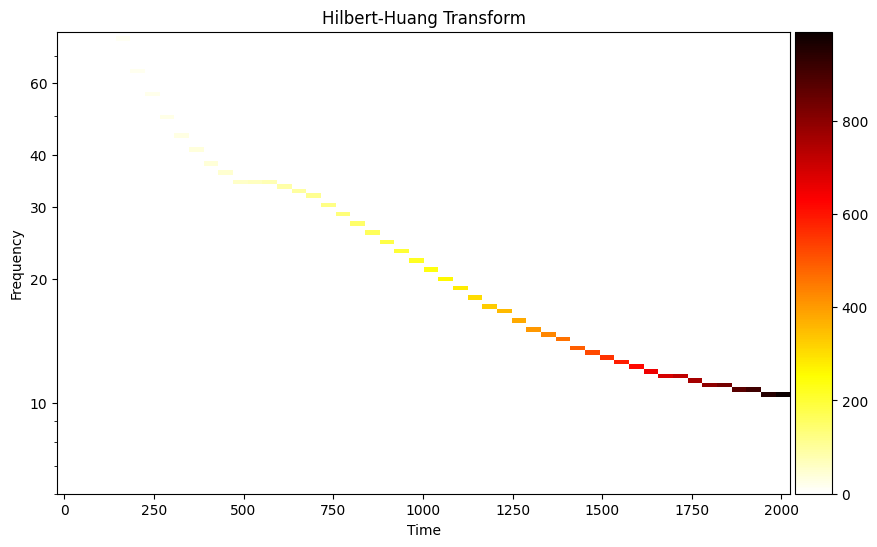

In [46]:
imf = emd.sift.sift(basis, max_imfs=5)
IP, IF, IA = emd.spectra.frequency_transform(imf, len(basis), 'nht')

for i in range(0, 5):
    freq_range = (6, 80, 100, 'log')

    f, hht = emd.spectra.hilberthuang(IF[:, i], IA[:, i], freq_range, sum_time=False)
    time_vect = np.linspace(0, len(basis))

    #Plot do espectro da IMF-i
    fig = plt.figure(figsize=(10, 6))
    print(f'IMF-{i+1}')
    emd.plotting.plot_hilberthuang(hht, time_vect, f,
                                time_lims=(0,len(basis)), freq_lims=(6, 80),
                                fig=fig, log_y=True)
    plt.show()

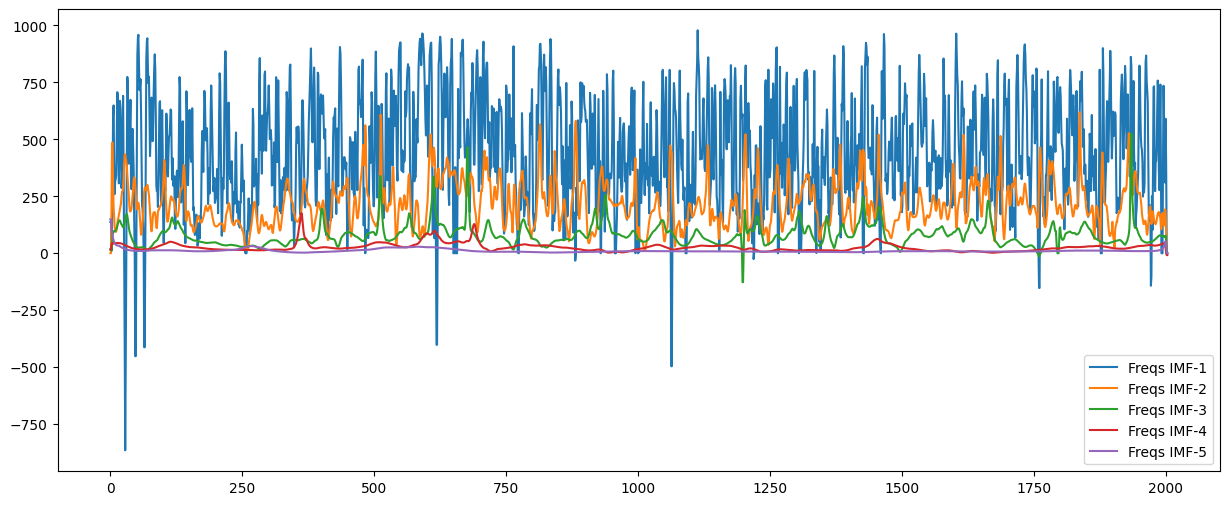

In [47]:
plt.figure(figsize=(15,6))
plt.plot(IF[:, 0], label='Freqs IMF-1')
plt.plot(IF[:, 1], label='Freqs IMF-2')
plt.plot(IF[:, 2], label='Freqs IMF-3')
plt.plot(IF[:, 3], label='Freqs IMF-4')
plt.plot(IF[:, 4], label='Freqs IMF-5')
plt.legend()
plt.show()

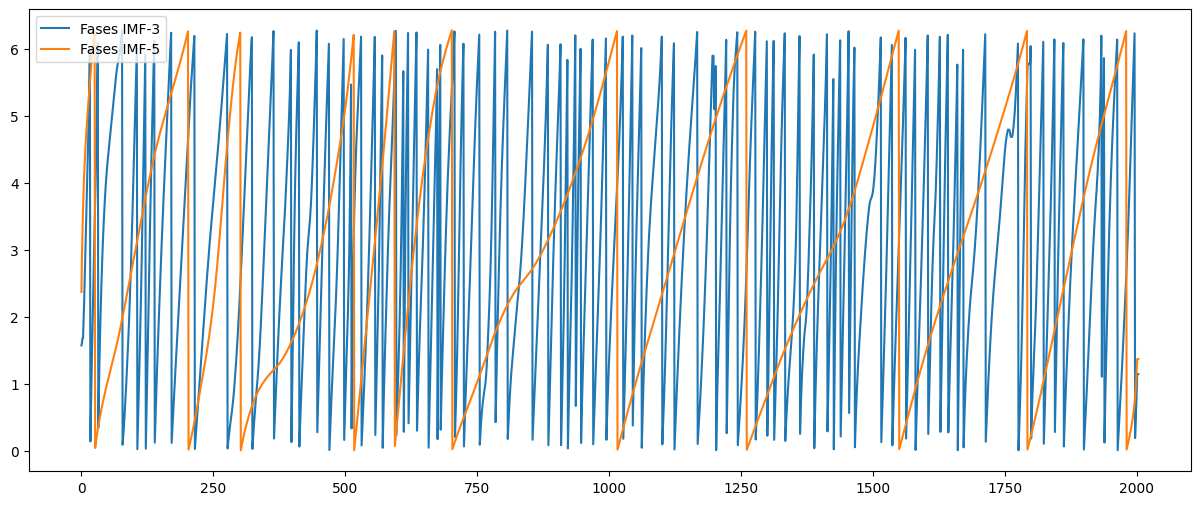

In [54]:
plt.figure(figsize=(15,6))
#plt.plot(IP[:, 0], label='Fases IMF-1')
#plt.plot(IP[:, 1], label='Fases IMF-2')
plt.plot(IP[:, 2], label='Fases IMF-3')
#plt.plot(IP[:, 3], label='Fases IMF-4')
plt.plot(IP[:, 4], label='Fases IMF-5')
plt.legend()
plt.show()

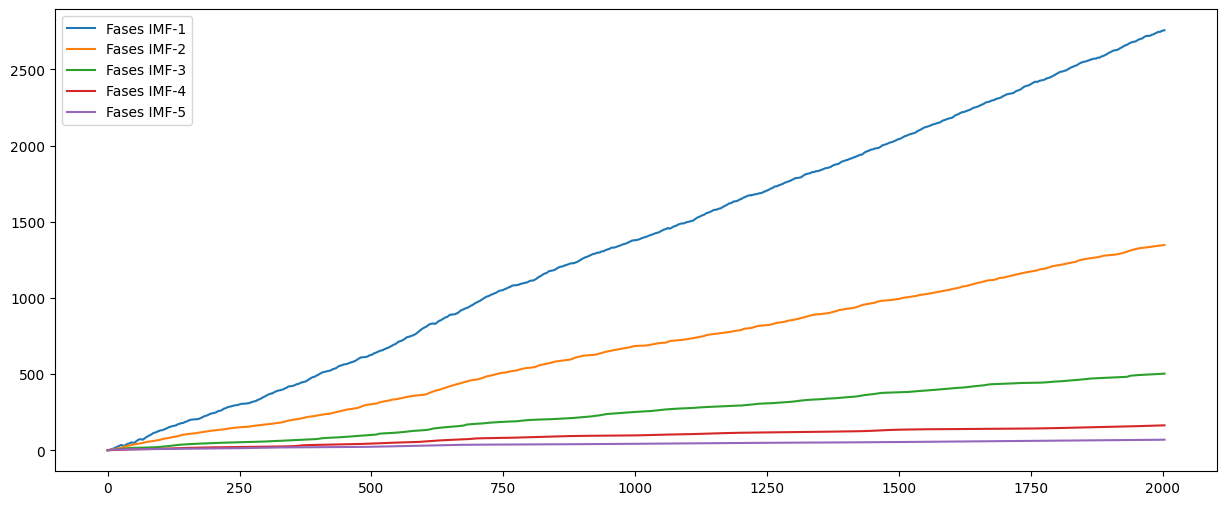

In [52]:
plt.figure(figsize=(15,6))
plt.plot(np.unwrap(IP[:, 0]), label='Fases IMF-1')
plt.plot(np.unwrap(IP[:, 1]), label='Fases IMF-2')
plt.plot(np.unwrap(IP[:, 2]), label='Fases IMF-3')
plt.plot(np.unwrap(IP[:, 3]), label='Fases IMF-4')
plt.plot(np.unwrap(IP[:, 4]), label='Fases IMF-5')
plt.legend()
plt.show()